In [ ]:
# https://colab.research.google.com/drive/1gN10JIqF8_qTG6MhEmoiU5UKlORzmT7K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/AI_VietNam/Module4/185_PT_DecisionTreeAndItsVariancesProject/230929-DecisionTreeandItsVariancesProject-Dr_Dinh_Vinh/dataset/cleveland.csv /content/

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Bai tap 1
df = pd. read_csv ('cleveland.csv', header = None )
df.columns = ['age','sex','cp','trestbps','chol',
              'fbs','restecg','thalach','exang',
              'oldpeak','slope','ca','thal','target']
df.head()
df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
df['target'] = df. target.map ({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna (df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean ())
df.info()
# distribution of target vs age

# Your code here *******************************

# plt.show ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


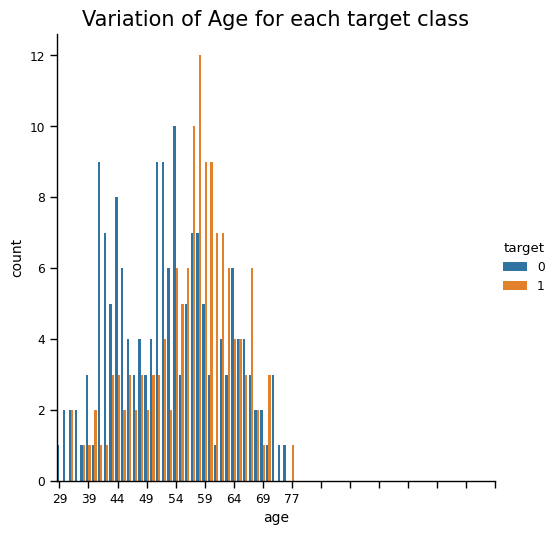

In [ ]:
sns.set_context("paper",font_scale=1,rc={"font.size": 3,"axes.titlesize":15,"axes.labelsize": 10})
ax = sns.catplot(kind='count',data=df, x='age', hue = 'target', order=df['age'].sort_values().unique())
# plt.plot(df['age'], df['target'])
ax.ax.set_xticks(np.arange(0,80,5))
plt.title('Variation of Age for each target class')
plt.show()
# df['age'].sort_values().unique()

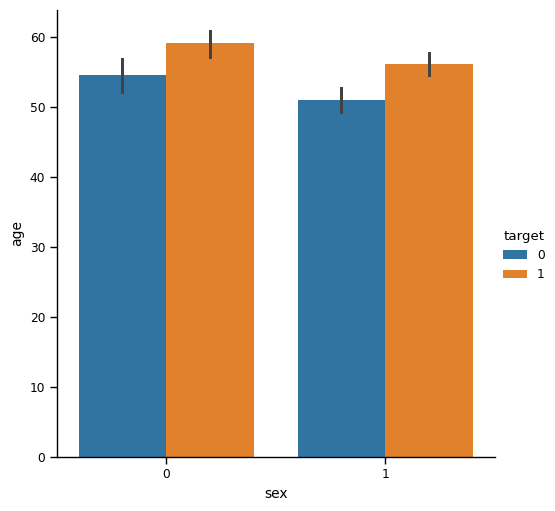

In [ ]:
# barplot of age vs sex with hue = target

sns.catplot(kind="bar",x='sex', y = 'age', data= df , hue='target')

plt.show()

In [ ]:
# using knn

X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split (X, y, test_size = 0.2 , random_state = 42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',leaf_size=30, p=2, metric='minkowski')

knn.fit(X_train,y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train =  knn.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [ ]:
print()
accuracy_for_train = np. round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for KNeighborsClassifier = {}'.format(
accuracy_for_train ))
print ('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test ))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


## using SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)

SVC()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train =  svm.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np. round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for SVM = {}'.format(
accuracy_for_train ))
print ('Accuracy for training set for SVM = {}'.format(accuracy_for_test ))


Accuracy for training set for SVM = 0.66
Accuracy for training set for SVM = 0.67


## Using Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = naive_bayes.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train =  naive_bayes.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np. round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train ))
print ('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_test ))


Accuracy for training set for Naive Bayes = 0.85
Accuracy for training set for Naive Bayes = 0.84


## Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
y_pred = dtc.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train =  dtc.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np. round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train ))
print ('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test ))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


### using random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train =  rfc.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np. round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np. round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train ))
print ('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test ))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


### Using AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
Adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
Adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred = Adaboost.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train =  Adaboost.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for Adaboost = {}'.format(accuracy_for_train ))
print ('Accuracy for test set for Adaboost = {}'.format(accuracy_for_test ))


Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


In [ ]:
GradientBoost = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3)
GradientBoost.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = GradientBoost.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train =  GradientBoost.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for GradientBoost = {}'.format(accuracy_for_train ))
print ('Accuracy for test set for GradientBoost = {}'.format(accuracy_for_test ))


Accuracy for training set for GradientBoost = 1.0
Accuracy for test set for GradientBoost = 0.85


### Using XGboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc = XGBClassifier(objective="binary:logistic", n_estimators = 100,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgbc.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train =  xgbc.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for XGboost = {}'.format(accuracy_for_train ))
print ('Accuracy for test set for XGboost = {}'.format(accuracy_for_test ))


Accuracy for training set for XGboost = 1.0
Accuracy for test set for XGboost = 0.87


## Stacking classifier
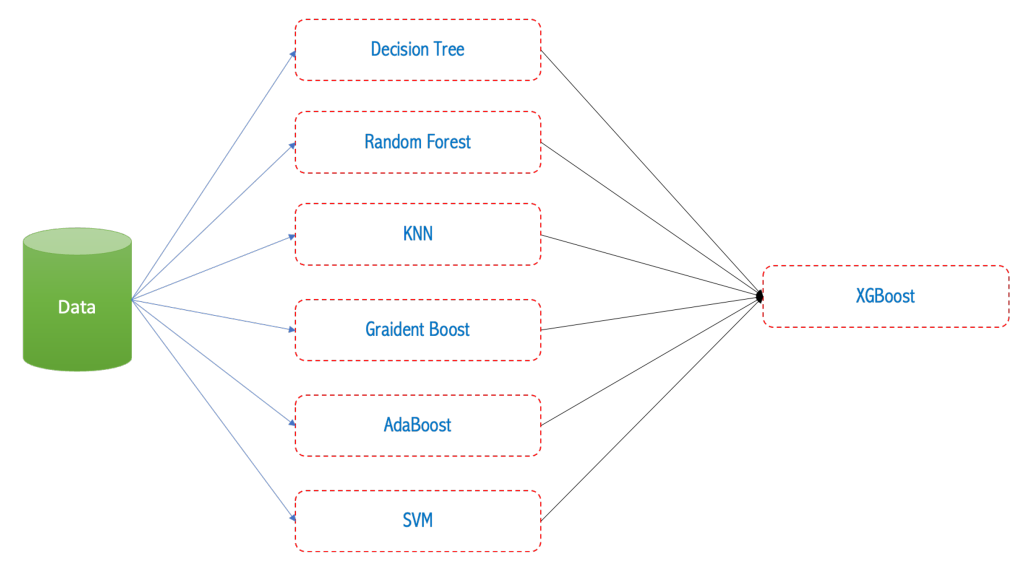

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = [
    ('dct',dtc),
    ('rfc',rfc),
    ('knn',knn),
    ('gb',GradientBoost),
    ('ad',Adaboost),
    ('svm',svm)
]
stackingclassifier = StackingClassifier(estimators=clf,final_estimator=xgbc)
stackingclassifier.fit(X_train,y_train)

StackingClassifier(estimators=[('dct', DecisionTreeClassifier(max_depth=10)),
                               ('rfc',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gb', GradientBoostingClassifier()),
                               ('ad', AdaBoostClassifier()), ('svm', SVC())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_byl...
                                                 feature_types=None, gamma=None,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=42, ...))

In [ ]:
y_pred = stackingclassifier.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train =  stackingclassifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round(( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np.round(( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for Stacking = {}'.format(accuracy_for_train ))
print ('Accuracy for test set for Stacking = {}'.format(accuracy_for_test ))


Accuracy for training set for Stacking = 0.9
Accuracy for test set for Stacking = 0.89
